In [163]:
#João Farias, nmec. 124964
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sympy as sy
import math
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
v0x= 0
v0y=2.3*math.pi
x0=1
y0=0
M = 2
m=1
G = (4* (math.pi)**2)/2

In [164]:
N=100000
tfinal=3
xt= np.empty(N)
yt= np.empty(N)
xt[0]=x0
yt[0]=y0
vxt= np.empty(N)
vyt= np.empty(N)
vxt[0]=v0x
vyt[0]=v0y
epg= np.empty(N)
ecin= np.empty(N)
et= np.empty(N)
t= np.empty(N)
t[0]= 0
dt=tfinal/N

In [165]:
def eulercromer():
    for i in range(N-1):
        r_abs2 = np.sqrt(xt[i]**2 + yt[i]**2)
        ax2=-G * (M/(r_abs2**2)) *(xt[i]/r_abs2)
        ay2=-G * (M/(r_abs2**2)) *(yt[i]/r_abs2)

                
        vxt[i+1]=vxt[i]+ax2*dt
        vyt[i+1]=vyt[i]+ay2*dt
        
        
        xt[i+1]=xt[i]+vxt[i+1]*dt
        yt[i+1]=yt[i]+vyt[i+1]*dt

        epg[i] = -(G * M * m)/(r_abs2)
        ecin[i] = 0.5*m*(vxt[i]**2)
        et[i]= epg[i] + ecin[i]
        
        t[i+1] = t[i] + dt

    return
eulercromer()

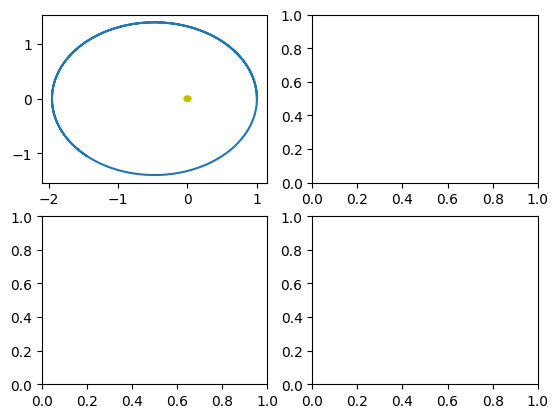

In [166]:
figure, axis = plt.subplots(2,2)
axis[0,0].plot(xt, yt, linestyle="-")
circle = patches.Circle((0, 0), 0.05, color='y', fill=True)
axis[0,0].add_patch(circle)

In [167]:
# A) Como podemos observar, a trajetória da Terra é elíptica e fechada.

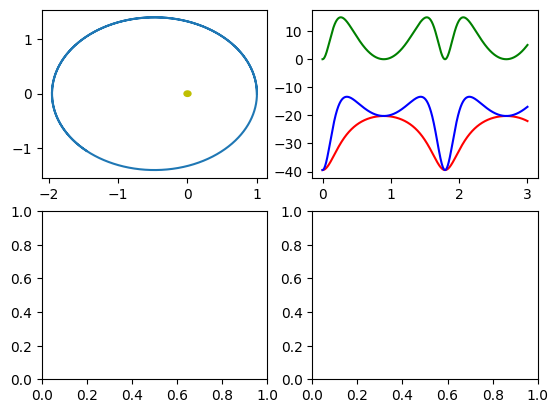

In [168]:
axis[0,1].plot(t[:-2], epg[:-2], linestyle="-", color="r")
axis[0,1].plot(t[:-2], ecin[:-2], linestyle="-", color="g")
axis[0,1].plot(t[:-2], et[:-2], linestyle="-", color="b")
figure

In [169]:
#A energia total não se mantém constante, ao contrário do que seria esperado deste sistema, dado que não sofre de forças não conservativas.
#Possívelmente, esta instabilidade das energias decorre dos erros de truncação do método de Euler-Cromer.